**Train set**

The train set is meant to be for system development and includes **~9.5k samples unequally distributed among 41 categories**. The **minimum number of audio samples per category in the train set is 94, and the maximum 300**. The duration of the audio **samples ranges from 300ms to 30s** due to the diversity of the sound categories and the preferences of Freesound users when recording sounds.

The train set is composed of **~3.7k manually-verified annotations and ~5.8k non-verified annotations**. **The quality of the non-verified annotations has been roughly estimated to be at least 65-70% in each sound category**. A flag for each annotation is provided which indicates whether or not that annotation has been manually verified. Participants can use this information during the development of their systems

Maximum number of points for samples: 1323000

In [1]:
#lib to work with music and audios https://librosa.github.io/librosa/
import librosa 

<b>Loading data</b>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import constants
%matplotlib inline

'''
Piece of code copied from https://www.kaggle.com/fizzbuzz/beginner-s-guide-to-audio-data
'''
import IPython.display as ipd  # To play sound in the notebook
np.random.seed(1001)
import os
import shutil
import IPython
import matplotlib
import seaborn as sns
from scipy.io import wavfile
#from tqdm import tqdm_notebook
#from sklearn.cross_validation import StratifiedKFold

#matplotlib.style.use('ggplot') - I prefer call the style as:
plt.style.use(['seaborn-white','ggplot'])

In [3]:
dataset = pd.read_csv(constants.basepath+"database/train.csv",header=0,names=['fname','label','verified'])

<b>Some vizualiations of a sample</b>

In [39]:
fnamesample1 = constants.basepath+"database/audio_train/"+ checkedDataset.fname.values[60] #00ad7068.wav"
rate1, data1 = wavfile.read(fnamesample1)

fnamesample2 = constants.basepath+"database/audio_train/"+checkedDataset.fname.values[67]#"database/audio_train/00c9e799.wav"
rate2, data2 = wavfile.read(fnamesample2)

In [40]:
print("Sample 1: rate = "+str(rate1)+" data length = "+str(len(data1)))
print("Sample 2: rate = "+str(rate2)+" data length = "+str(len(data2)))

Sample 1: rate = 44100 data length = 75852
Sample 2: rate = 44100 data length = 204624


In [41]:
#dataset["label"][:2]
checkedDataset.label.values[60:68]

array(['Knock', 'Finger_snapping', 'Knock', 'Fireworks', 'Cello',
       'Violin_or_fiddle', 'Telephone', 'Oboe'], dtype=object)

Plotting

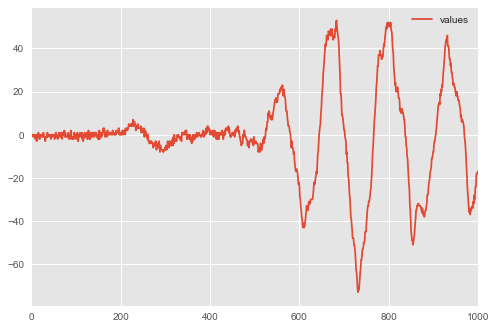

In [85]:
data2plot1 = pd.DataFrame(data1[0:1000],columns = ['values'])
data2plot1.plot()
plt.show()

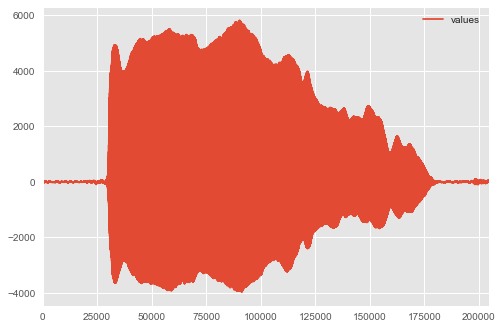

In [43]:
data2plot2 = pd.DataFrame(data2,columns = ['values'])
data2plot2.plot()
plt.show()

Hearing

In [44]:
ipd.Audio(fnamesample1)

In [45]:
ipd.Audio(fnamesample2)

<b>Loading all wav files</b>

1)We are gonna use only checked data for the first training and validations steps.

2)Using wavfile.read on each files' name.

3)Because all files has the same rate, 44.1 kHz, only the data as an numpy array is gonna be kept. 

In [21]:
checkedDataset = dataset.loc[dataset.verified == 1,["fname","label"]]

In [22]:
checkedDataset.fname.values[0]

'001ca53d.wav'

In [49]:
basepathWAVfiles = constants.basepath+"database/audio_train/"

In [48]:
#paddedData = []
originalData = []
#normalData = []
target = []
maxLength = 1323000
for sample in checkedDataset.values:
    fname,label = sample
    try:
        _,data = wavfile.read(basepathWAVfiles+fname)
       
        #paddedData.append(np.pad(data, (0,maxLength-len(data)), 'constant').astype(np.float))
        originalData.append(data.astype(np.float))
        #normalData.append(data/np.sum(data))
        target.append(label)
    except:
        print("File "+fname+' do not exist!') 

<b>Training and validation sets</b>

We are gonna use only checked data for the first training and validations steps by using cross-validation of 10-fold, each time training on 90% of the data and testing on 10%.

Features in paddedData #dimension [3710 samples, 1323000 features]

Labels in target

# Sounds properties

Source: https://www.nde-ed.org/EducationResources/HighSchool/Sound/components.htm

Why are sounds different?

The differences between sounds are caused by intensity, pitch, and tone.

<b>Intensity</b>

Sound is a wave and waves have amplitude, or height. Amplitude is a measure of energy. The more energy a wave has, the higher its amplitude. As amplitude increases, intensity also increases. Intensity is the amount of energy a sound has over an area. The same sound is more intense if you hear it in a smaller area. In general, we call sounds with a higher intensity louder. Intensity is measured in decibels.

<b>Pitch</b>

Pitch helps us distinguish between low and high sounds. Imagine that a singer sings the same note twice, one an octave above the other. 

Pitch depends on the frequency of a sound wave. Frequency is the number of wavelengths that fit into one unit of time. Frequencies are measured in hertz. One hertz is equal to one cycle of compression and rarefaction per second. High sounds have high frequencies and low sounds have low frequencies. 

<b>Tone & Harmonics</b>

A violin sounds different than a flute playing the same pitch. This is because they have a different tone, or sound quality. When a source vibrates, it actually vibrates with many frequencies at the same time. Each of those frequencies produces a wave. Sound quality depends on the combination of different frequencies of sound waves.

Imagine a guitar string tightly stretched. If we strum it, the energy from our finger is transferred to the string, causing it to vibrate. When the whole string vibrates, we hear the lowest pitch. This pitch is called the fundamental. Remember, the fundamental is really only one of many pitches that the string is producing. Parts of the string vibrating at frequencies higher than the fundamental are called overtones, while those vibrating in whole number multiples of the fundamental are called harmonics. A frequency of two times the fundamental will sound one octave higher and is called the second harmonic. A frequency four times the fundamental will sound two octaves higher and is called the fourth harmonic. Because the fundamental is one times itself, it is also called the first harmonic.

# Describing data in function of ...

<b>Describing data in function of tone</b>

In [50]:
'''
The Tonnetz is a pitch space defined by the network of relationships between
musical pitches in just intonation. (source: http://www.nyu.edu/classes/bello/MIR_files/tonality.pdf)

Package: https://librosa.github.io/librosa/generated/librosa.feature.tonnetz.html#librosa.feature.tonnetz
'''

tone=list(map(lambda x: librosa.feature.tonnetz(y=x, sr=44100, chroma=None), originalData))

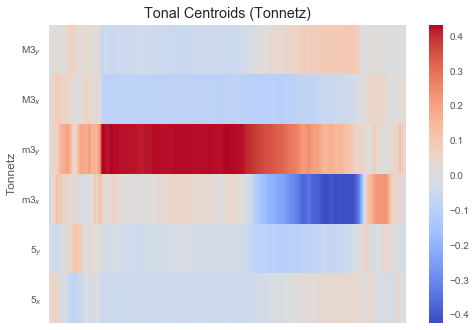

In [58]:
import matplotlib.pyplot as plt
from librosa.display import specshow
#plt.subplot(2, 1, 1)
tonnetz = []
for t in tone[67]:
    tonnetz.append(np.asarray(t))
librosa.display.specshow(np.asarray(tonnetz), y_axis='tonnetz')
plt.colorbar()
plt.title('Tonal Centroids (Tonnetz)')

In [73]:
#Could not execute the following line because it takes forever
#tonePaddedData=list(map(lambda x: librosa.feature.tonnetz(y=x, sr=44100, chroma=None), paddedData))

In [67]:
sizes=[len(i[0]) for i in tone ]
max2DTone = 2584

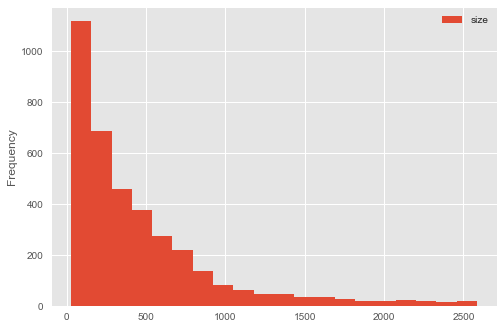

In [60]:
sizes = pd.DataFrame(sizes,columns=['size'])
sizes.plot.hist(bins=20)
plt.show()

In [53]:
import collections
counter=collections.Counter(sizes)
data2plot1 = pd.DataFrame.from_dict(counter, orient='index')
data2plot1["size"] = data2plot1.index

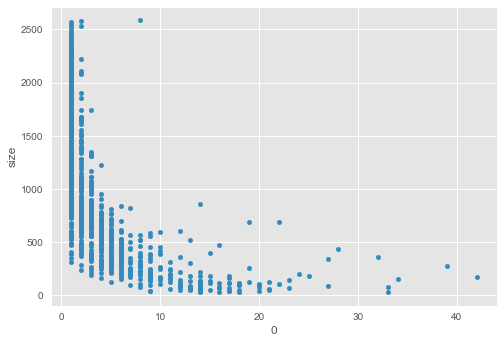

In [54]:
data2plot1.plot.scatter(x=0, y='size')
plt.show()

According to the plots below, most of the samples (3311/3710 = 90%) have size smaller than 1000, that is why the array for each channel of the samples will be fixed to 1000.

The code below, (1) cut the arrays in tone that are bigger than 1k or pad the arrays till the size 1000, (2) reshape the array to 1 dimension.

The pad1000_1DToneOriginalData has each sample's tone limited to size 6000.

In [77]:
def paddingDescriptions(description,maxSize):
    '''
    Pads the descriptions into size maxSize and makes it 1D for each sample
    '''
    paddedData = []
    for d in description:
        if(len(d[0])>maxSize):
            d=d[:,:maxSize]
            d = np.reshape(d,[-1])
        else:
            newd=[]
            j=0
            for i in d:
                i = np.pad(i,(0,maxSize-len(i)), 'constant')
                newd.append(i)
            d = np.reshape(np.array(newd),[-1])
        d = d.astype(np.float64)
        paddedData.append(d)
    return paddedData

def plotSizeDistribution2ndD(description):
    '''
    Check Second dimensions' size distributions
    '''
    sizes=[len(i[0]) for i in description]
    sizes = pd.DataFrame(sizes,columns=['size'])
    sizes.plot.hist(bins=50)
    plt.show()

In [9]:
tonepadded1000 = paddingDescriptions(tone,1000)

<b>Describing data in function of spectral centroid.</b>

https://librosa.github.io/librosa/generated/librosa.feature.spectral_centroid.html#librosa.feature.spectral_centroid

Function: librosa.feature.spectral_centroid

In [59]:
specCentroid = list(map(lambda x: librosa.feature.spectral_centroid(y=x, sr=44100), originalData))

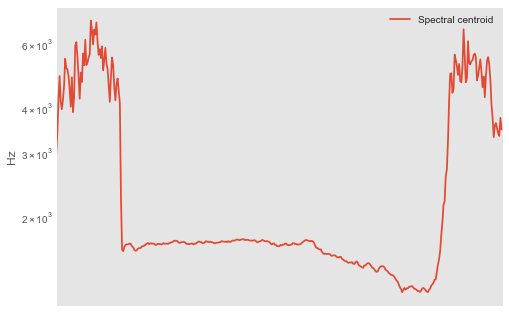

In [62]:
import matplotlib.pyplot as plt
from librosa.display import specshow

plt.figure()
cent = np.asarray(specCentroid[67])
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()

In [29]:
specCentroid = paddingDescriptions(specCentroid,1000)

<b>Describing data in function of spectral bandwidth.</b>

https://librosa.github.io/librosa/generated/librosa.feature.spectral_bandwidth.html#librosa.feature.spectral_bandwidth

In [61]:
specBandwidth = list(map(lambda x: librosa.feature.spectral_bandwidth(y=x, sr=44100), originalData))

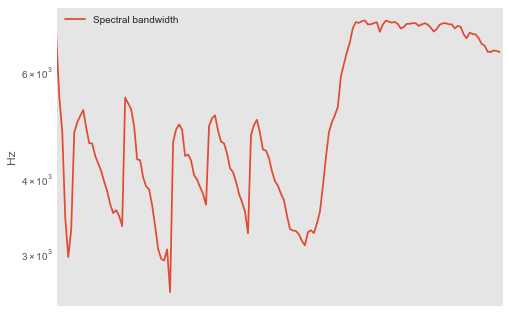

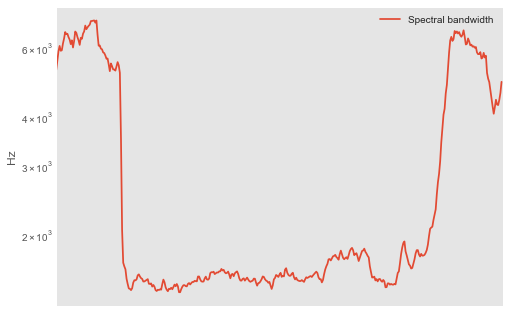

In [64]:
import matplotlib.pyplot as plt
from librosa.display import specshow

plt.figure()
spec_bw = np.asarray(specBandwidth[60])
plt.semilogy(spec_bw.T, label='Spectral bandwidth')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, spec_bw.shape[-1]])
plt.legend()


plt.figure()
spec_bw = np.asarray(specBandwidth[67])
plt.semilogy(spec_bw.T, label='Spectral bandwidth')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, spec_bw.shape[-1]])
plt.legend()

In [84]:
#Check Second dimensions' size distributions
print(len(specBandwidth[0]))

1


In [31]:
specBandwidth = paddingDescriptions(specBandwidth,1000)

<b>Describing data in function of Mel-frequency cepstral coefficients (MFCCs).</b>

https://librosa.github.io/librosa/generated/librosa.feature.mfcc.html#librosa.feature.mfcc

In [63]:
mfcc = list(map(lambda x: librosa.feature.mfcc(y=x, sr=44100), originalData))
#DImensions 20x (number related to the size)

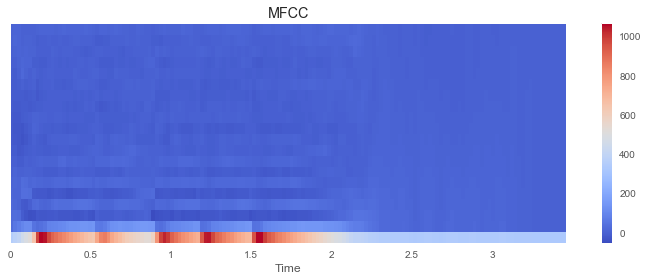

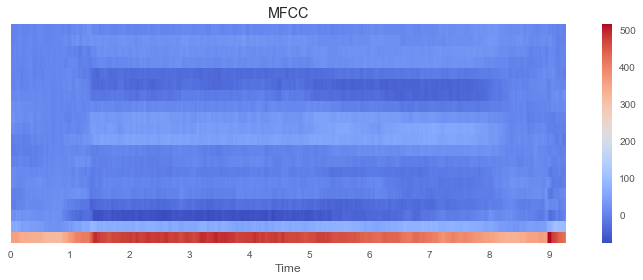

In [65]:
plt.figure(figsize=(10, 4))
mfccs = []
for t in mfcc[60]:
    mfccs.append(np.asarray(t))
librosa.display.specshow(np.asarray(mfccs), x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

plt.figure(figsize=(10, 4))
mfccs = []
for t in mfcc[67]:
    mfccs.append(np.asarray(t))
librosa.display.specshow(np.asarray(mfccs), x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

20


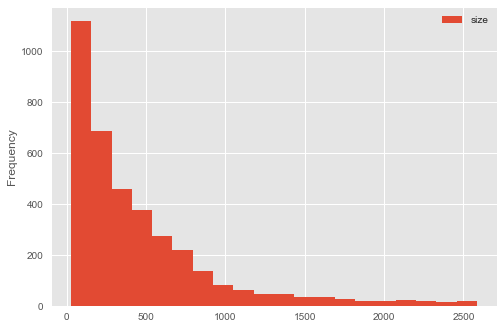

In [11]:
#Check Second dimensions' size distributions
print(len(mfcc[0]))
plotSizeDistribution2ndD(mfcc)

In [12]:
mfcc = paddingDescriptions(mfcc,1000)

<b>Describing data in function of power spectrogram stft.</b>

In [66]:
stft = list(map(lambda x: librosa.stft(y=x), originalData))

C:\Users\miria\Anaconda3\lib\site-packages\librosa\core\spectrum.py:959: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


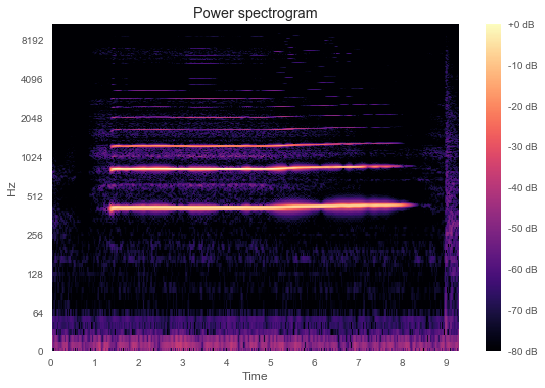

In [69]:
# Display a spectrogram
from librosa.display import specshow
specshow(librosa.amplitude_to_db(stft[67],ref=np.max),y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

1025


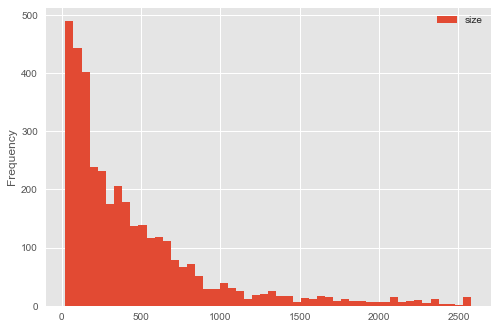

In [35]:
#Check Second dimensions' size distributions
print(len(stft[0]))
plotSizeDistribution2ndD(stft)

<b>Describing data in function of mel-scaled spectrogram ().</b>

https://librosa.github.io/librosa/generated/librosa.feature.melspectrogram.html

In [71]:
mel_spe = list(map(lambda x: librosa.feature.melspectrogram(S=np.abs(x)**2), stft))

128


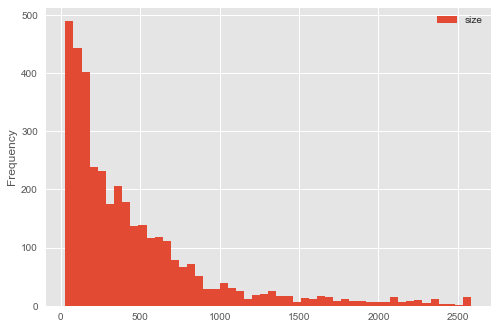

In [78]:
#Check Second dimensions' size distributions
print(len(mel_spe[0]))
plotSizeDistribution2ndD(mel_spe)

In [79]:
mel_spePAD1000 = paddingDescriptions(mel_spe,1000)

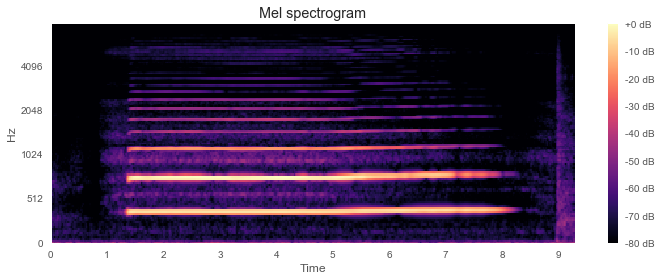

In [75]:
plt.figure(figsize=(10, 4))
specshow(librosa.power_to_db(mel_spe[67],ref=np.max),y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

<b>MLP and Random Forest classifiers</b>

First results: Creating a standard MLP from scikit-learn, training and testing the approach

In [81]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clfMLP = MLPClassifier(
    hidden_layer_sizes = (2560,1024,256),
    activation = 'relu',
    solver = 'adam',
    batch_size = 50,
    learning_rate = 'invscaling',
    learning_rate_init =0.3,
    tol = 1e-3,
    verbose = True,
    )

clfRF = RandomForestClassifier(n_estimators = 1000, criterion="entropy", n_jobs=-1)

def crossValidation(features,lables,clf=['MLP','RF'],cv=5):
    
    if('MLP' in clf):
        print('Scores for Scikit-Learn MLP:')
        scores = cross_val_score(clfMLP, features,lables,cv=cv,scoring='accuracy')
        resultsMLP = [scores,scores.mean(),scores.std()]
        print(str(resultsMLP))
    
    if('RF' in clf):
        print('Scores for RF:')
        scoresRF = cross_val_score(clfRF, features, lables,cv=cv,scoring='accuracy')
        resultsRF = [scoresRF,scoresRF.mean(),scoresRF.std()]
        print(str(resultsRF))

# Training and testing classifiers

Using tone

In [15]:
#tone
crossValidation(tone,target,clf=['RF'],cv=10)

Scores for RF:
[array([ 0.30649351,  0.32114883,  0.34036939,  0.31926121,  0.33068783,
        0.32795699,  0.31607629,  0.30277778,  0.32492997,  0.33142857]), 0.32211303738271557, 0.010949952303016463]


In [ ]:
#crossValidation(tone,target,clf=['MLP'],cv=10)
#[array([ 0.06753247,  0.06527415,  0.06860158,  0.06860158,  0.06613757,
#        0.06989247,  0.06811989,  0.06944444,  0.07002801,  0.07142857]), 0.068506074253692956, 0.001755857894955305]

Using spectral centroid

In [ ]:
#specCentroid
crossValidation(specCentroid,target,clf=['RF'],cv=10)

In [ ]:
#crossValidation(specCentroid,target,clf=['MLP'],cv=3)
#[array([0.0686901 , 0.06882591, 0.0678659 ]), 0.06846063676458795, 0.00042417933477714254]

Using spectral bandwidth

In [39]:
#specBandwidth
crossValidation(specBandwidth,target,clf=['RF'],cv=3)

Scores for RF:
[array([0.44888179, 0.43076923, 0.43254293]), 0.4373979823782462, 0.008152499127789991]


In [ ]:
#crossValidation(specBandwidth,target,clf=['MLP'],cv=3)
#[array([0.0686901 , 0.06720648, 0.06950123]), 0.06846593335722372, 0.0009501419485123065]

Using mfcc

In [29]:
clfRF = RandomForestClassifier(n_estimators = 500, n_jobs=-1)
crossValidation(mfcc,target,clf=['RF'],cv=10)

Scores for RF:
[array([ 0.68051948,  0.65535248,  0.68601583,  0.62532982,  0.7037037 ,
        0.67741935,  0.66757493,  0.66666667,  0.6442577 ,  0.68285714]), 0.66896971104027947, 0.021453384590393306]


Using mel-spectograms

In [83]:
clfRF = RandomForestClassifier(n_estimators = 1000, n_jobs=-1)
crossValidation(mel_spePAD1000,target,clf=['RF'],cv=10)

Scores for RF:
[array([ 0.65454545,  0.64490862,  0.6701847 ,  0.63060686,  0.67195767,
        0.64516129,  0.63760218,  0.63333333,  0.60784314,  0.68285714]), 0.64790003830238196, 0.021400537162279857]
